<a href="https://colab.research.google.com/github/Sourav-Manik/AI-Assignments/blob/main/Assignment_9_Image_Classification_(Fashion_MNIST_Clothing).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##1.Import Library##

In [ ]:
import tensorflow as tf
from tensorflow import keras
from matplotlib import pyplot as plt
import keras,os 
from keras.models import Sequential
from keras.layers import Flatten, Dense, Conv2D, Dropout, MaxPooling2D, AveragePooling2D
import numpy as np
import pandas as pd
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.applications.resnet import ResNet50

In [ ]:
tf.__version__

'2.9.2'

##2.Import Data##

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [ ]:
x_test.shape, y_test.shape

((10000, 28, 28), (10000,))

##3.Data Understanding##

**Data Description**

*Each image is 28 pixels in height and 28 pixels in width, for a total of 784 
pixels in total.

*Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255.

*The training and test data sets have 785 columns.

*The first column consists of the class labels (see above), and represents the article of clothing.

*The rest of the columns contain the pixel-values of the associated image.

To locate a pixel on the image, suppose that we have decomposed x as x = i * 28 + j, where i and j are integers between 0 and 27.The pixel is located on row i and column j of a 28 x 28 matrix. For example, pixel31 indicates the pixel that is in the fourth column from the left, and the second row from the top, as in the ascii-diagram below.

**Labels**

Each training and test example is assigned to one of the following labels:

0 T-shirt/top

1 Trouser

2 Pullover

3 Dress

4 Coat

5 Sandal

6 Shirt

7 Sneaker

8 Bag

9 Ankle boot

<function matplotlib.pyplot.show(*args, **kw)>

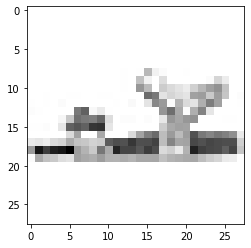

In [ ]:
plt.imshow(X=x_train[59999],cmap='binary')
plt.show

In [ ]:
y_train[59999]

5

<function matplotlib.pyplot.show(*args, **kw)>

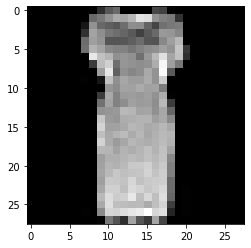

In [ ]:
plt.imshow(X=x_train[455],cmap='gist_gray')
plt.show

In [ ]:
y_train[455]

3

##4.Data preparation##

In [ ]:
x_train.std(), x_test.std()

(90.02118235130519, 89.87325907809718)

In [ ]:
x_train= x_train/255
x_test= x_test/255   

In [ ]:
x_train.std(), x_test.std()

(0.35302424451492237, 0.35244415324744005)

In [ ]:
from keras.utils import to_categorical

In [ ]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [ ]:
#Applying one hot encoding for output features as we gonna use softmax AF as the output layer

In [ ]:
y_train_encoded = to_categorical(y=y_train)
y_test_encoded = to_categorical(y_test)

In [ ]:
y_train_encoded

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
y_train_encoded.shape

(60000, 10)

In [ ]:
x_train_reshape = x_train.reshape(x_train.shape[0],28,28,1)
x_test_reshape = x_test.reshape(x_test.shape[0],28,28,1)

In [ ]:
x_train_reshape.shape, x_test_reshape.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

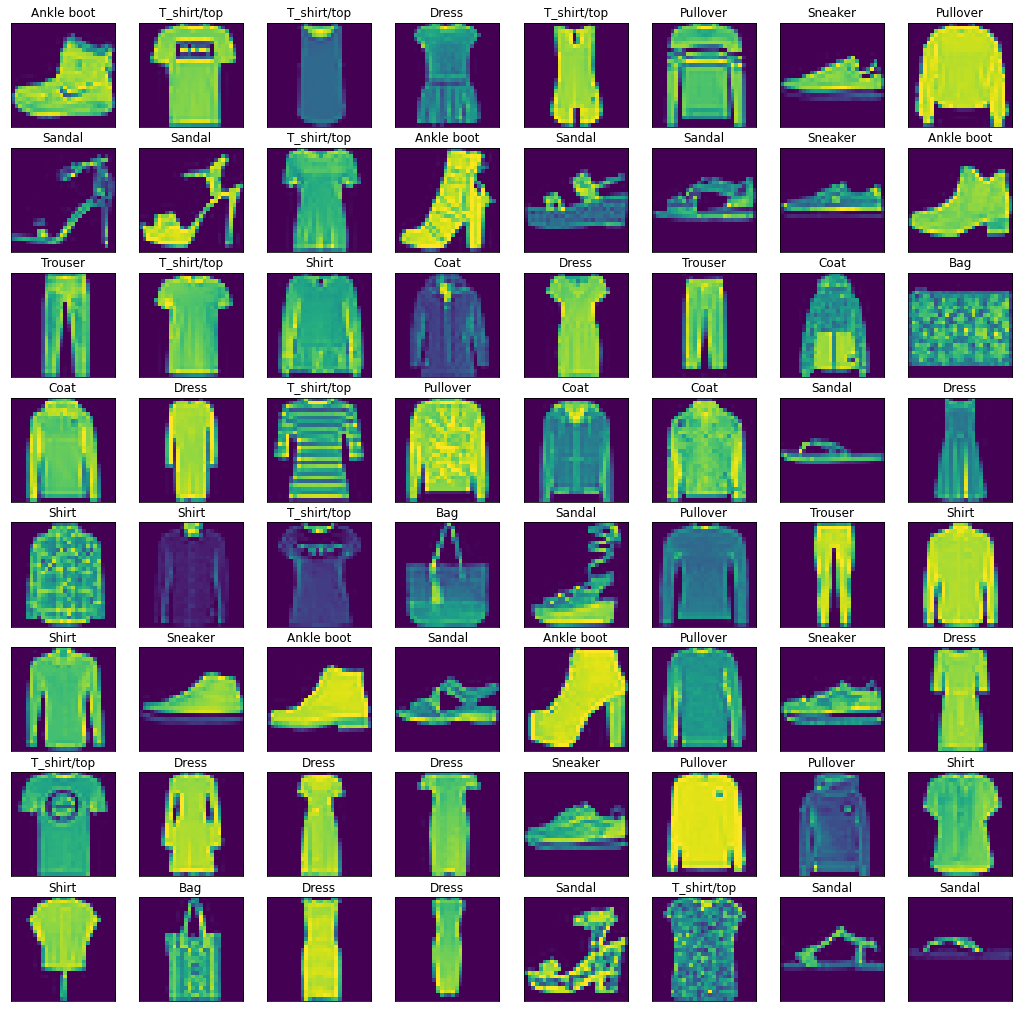

In [ ]:
class_names = ['T_shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
plt.figure(figsize=(18, 18))
for i in range(64):
    plt.subplot(8, 8, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i].reshape((28,28)))
    label_index = int(y_train[i])
    plt.title(class_names[label_index])
plt.show()

#ANN

##Model building##

###Building the architecture###

In [ ]:
from keras import Sequential
from keras.layers import Flatten, Dense

In [ ]:
Ann_model = Sequential()
Ann_model.add(Flatten(input_shape=(28,28,1)))
Ann_model.add(Dense(units=50,activation='relu')) #Hidden layer 1
Ann_model.add(Dense(units=30,activation='relu')) #Hidden layer 2
Ann_model.add(Dense(units=10,activation='softmax')) #Output layer 

###Model Compilation###

In [ ]:
Ann_model.compile(optimizer='adam',loss='categorical_crossentropy',metrics='accuracy')

##Model Training##

In [ ]:
training= Ann_model.fit(x= x_train_reshape,y= y_train_encoded,batch_size = 32,epochs=10,validation_data=(x_test_reshape,y_test_encoded),validation_steps =len(y_test))

Epoch 1/10
1867/1875 [============================>.] - ETA: 0s - loss: 0.5282 - accuracy: 0.8150

1875/1875 [==============================] - 9s 3ms/step - loss: 0.5280 - accuracy: 0.8151 - val_loss: 0.4389 - val_accuracy: 0.8403
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3918 - accuracy: 0.8597
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3580 - accuracy: 0.8712
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3345 - accuracy: 0.8785
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3185 - accuracy: 0.8838
Epoch 6/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3052 - accuracy: 0.8870
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2924 - accuracy: 0.8907
Epoch 8/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2846 - accuracy: 0.8947
Epoch 9/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2736 - accuracy: 0.8984
Epoch 10/10
1875/1875 [============================

##Model Testing##

In [ ]:
Ann_model_evaluation_score = Ann_model.evaluate(x=x_test_reshape,y=y_test_encoded)

313/313 [==============================] - 1s 2ms/step - loss: 0.3522 - accuracy: 0.8719


In [ ]:
Ann_model_evaluation_score

[0.3521796762943268, 0.8719000220298767]

In [ ]:
print('Loss        =', Ann_model_evaluation_score[0])
print('Accuracy    =', Ann_model_evaluation_score[1])

Loss        = 0.3521796762943268
Accuracy    = 0.8719000220298767


In [ ]:
Ann_model_loss = Ann_model_evaluation_score[0]
Ann_model_accuracy = Ann_model_evaluation_score[1]

##Model Prediction

<function matplotlib.pyplot.show(*args, **kw)>

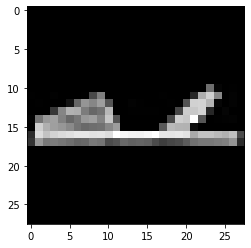

In [ ]:
plt.imshow(x_test_reshape[111].reshape(28,28),cmap='gray')
plt.show

In [ ]:
y_pred = Ann_model.predict(x_test_reshape)

313/313 [==============================] - 0s 1ms/step


In [ ]:
np.argmax(y_test_encoded[111])

5

#CNN

##Model Building

###Building the Architecture

In [ ]:
Cnn_model = Sequential()
Cnn_model.add(Conv2D(input_shape=(28,28,1),filters = 16,kernel_size = (2,2),strides = 1,padding='same',activation = 'relu'))
Cnn_model.add(MaxPooling2D(pool_size = (2,2),strides = 2))
Cnn_model.add(Conv2D(filters = 32,kernel_size = (2,2),activation = 'relu'))
Cnn_model.add(MaxPooling2D(pool_size = (2,2),strides = 2))
Cnn_model.add(Flatten())
Cnn_model.add(Dense(units=2000,activation = 'relu'))
Cnn_model.add(Dropout(0.30))
Cnn_model.add(Dense(units=10,activation = 'softmax'))
Cnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        80        
                                                                 
 flatten_1 (Flatten)         (None, 12544)             0         
                                                                 
 dense_3 (Dense)             (None, 2000)              25090000  
                                                                 
 dropout (Dropout)           (None, 2000)              0         
                                                                 
 dense_4 (Dense)             (None, 10)                20010     
                                                                 
Total params: 25,110,090
Trainable params: 25,110,090
Non-trainable params: 0
_________________________________________________________________


###Model Compilation

In [ ]:
Cnn_model.compile(optimizer='adam',loss='categorical_crossentropy',metrics='accuracy')

##Model Training

In [ ]:
model_training = Cnn_model.fit(x=x_train_reshape,y= y_train_encoded,batch_size=32,epochs = 5,validation_data=(x_test_reshape,y_test_encoded),verbose = 1)

Epoch 1/5
1875/1875 [==============================] - 22s 8ms/step - loss: 0.3816 - accuracy: 0.8649 - val_loss: 0.3077 - val_accuracy: 0.8856
Epoch 2/5
1875/1875 [==============================] - 16s 9ms/step - loss: 0.2434 - accuracy: 0.9104 - val_loss: 0.2936 - val_accuracy: 0.8938
Epoch 3/5
1875/1875 [==============================] - 16s 8ms/step - loss: 0.1811 - accuracy: 0.9341 - val_loss: 0.2861 - val_accuracy: 0.9043
Epoch 4/5
1875/1875 [==============================] - 16s 9ms/step - loss: 0.1350 - accuracy: 0.9517 - val_loss: 0.2966 - val_accuracy: 0.9024
Epoch 5/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1000 - accuracy: 0.9636 - val_loss: 0.3345 - val_accuracy: 0.9045


##Model Testing

In [ ]:
Cnn_model_evaluation_score = Cnn_model.evaluate(x=x_test_reshape,y=y_test_encoded)

313/313 [==============================] - 1s 3ms/step - loss: 0.3345 - accuracy: 0.9045


In [ ]:
Cnn_model_evaluation_score

[0.3345250189304352, 0.9045000076293945]

In [ ]:
print('Loss        =', Cnn_model_evaluation_score[0])
print('Accuracy    =', Cnn_model_evaluation_score[1])

Loss        = 0.3345250189304352
Accuracy    = 0.9045000076293945


In [ ]:
Cnn_model_loss = Cnn_model_evaluation_score[0]
Cnn_model_accuracy = Cnn_model_evaluation_score[1]

##Model Prediction

<function matplotlib.pyplot.show(*args, **kw)>

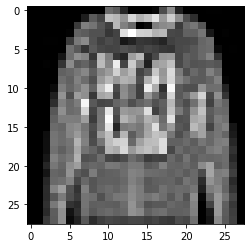

In [ ]:
plt.imshow(x_test_reshape[500].reshape(28,28),cmap='gray')
plt.show

In [ ]:
y_pred = Cnn_model.predict(x_test_reshape)

313/313 [==============================] - 1s 2ms/step


In [ ]:
np.argmax(y_test_encoded[500])

2

#**CNN Architectures**

#CNN - Lenet 5 Architecture

##Data preparation/ preprocessing

In [ ]:
x_train_Lenet = np.pad(array = x_train, pad_width = ((0,0),(2,2),(2,2)))
x_test_Lenet = np.pad(array = x_test, pad_width = ((0,0),(2,2),(2,2)))

In [ ]:
x_train_Lenet.shape,x_test_Lenet.shape

((60000, 32, 32), (10000, 32, 32))

In [ ]:
x_train_Lenet = np.reshape(x_train_Lenet, newshape = (60000,32,32,1))
x_test_Lenet = np.reshape(x_test_Lenet, newshape = (10000,32,32,1))

In [ ]:
x_train_Lenet.shape,x_test_Lenet.shape

((60000, 32, 32, 1), (10000, 32, 32, 1))

In [ ]:
x_train_Lenet.std(), x_test_Lenet.std()

(0.3318113729999589, 0.33146432631770273)

In [ ]:
x_train_Lenet = x_train_Lenet.astype('float')
x_test_Lenet = x_test_Lenet.astype('float')

In [ ]:
x_train_Lenet.dtype, x_test_Lenet.dtype

(dtype('float64'), dtype('float64'))

In [ ]:
# x_train_Lenet = x_train_Lenet/255
# x_test_Lenet = x_test_Lenet/255

In [ ]:
x_train_Lenet.std(), x_test_Lenet.std()

(0.3318113729999589, 0.33146432631770273)

##Model Building

###Building the architecture###

In [ ]:
Cnn_Lenet_5_model = Sequential()
Cnn_Lenet_5_model.add(Conv2D(input_shape = (32,32,1),filters = 6,kernel_size = (5,5),strides = 1,padding = 'valid',activation = 'tanh'))
Cnn_Lenet_5_model.add(AveragePooling2D(pool_size =2 ,strides = 2))
Cnn_Lenet_5_model.add(Conv2D(filters = 16,kernel_size = (5,5),strides = 1,padding = 'valid',activation = 'tanh'))
Cnn_Lenet_5_model.add(AveragePooling2D(pool_size =2 ,strides = 2))
Cnn_Lenet_5_model.add(Conv2D(filters = 120,kernel_size = (5,5),strides = 1,padding = 'valid',activation = 'tanh'))
Cnn_Lenet_5_model.add(Flatten())
Cnn_Lenet_5_model.add(Dense(units = 84, activation = 'tanh'))
Cnn_Lenet_5_model.add(Dense(units = 10, activation = 'softmax'))
Cnn_Lenet_5_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d (AverageP  (None, 14, 14, 6)        0         
 ooling2D)                                                       
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_1 (Averag  (None, 5, 5, 16)         0         
 ePooling2D)                                                     
                                                                 
 conv2d_3 (Conv2D)           (None, 1, 1, 120)         48120     
                                                                 
 flatten_2 (Flatten)         (None, 120)              

###Model Compilation###

In [ ]:
Cnn_Lenet_5_model.compile(optimizer = 'sgd',loss = 'sparse_categorical_crossentropy',metrics='sparse_categorical_accuracy')

In [ ]:
x_train_Lenet.shape, y_train.shape, x_test_Lenet.shape, y_test.shape

((60000, 32, 32, 1), (60000,), (10000, 32, 32, 1), (10000,))

##Model Training##

In [ ]:
training= Cnn_Lenet_5_model.fit(x= x_train_Lenet,y= y_train,batch_size = 32,epochs=10,validation_data=(x_test_Lenet,y_test),validation_steps =len(y_test),verbose = 2)
#model_training = model.fit(x=x_train_Lenet,y=y_train,batch_size = 150,epochs = 25, validation_data=(x_test_Lenet,y_test),verbose = 2, ,validation_steps =len(y_test))

Epoch 1/10


1875/1875 - 6s - loss: 0.8458 - sparse_categorical_accuracy: 0.7070 - val_loss: 0.6276 - val_sparse_categorical_accuracy: 0.7705 - 6s/epoch - 3ms/step
Epoch 2/10
1875/1875 - 5s - loss: 0.5454 - sparse_categorical_accuracy: 0.8032 - 5s/epoch - 2ms/step
Epoch 3/10
1875/1875 - 5s - loss: 0.4765 - sparse_categorical_accuracy: 0.8293 - 5s/epoch - 2ms/step
Epoch 4/10
1875/1875 - 4s - loss: 0.4385 - sparse_categorical_accuracy: 0.8435 - 4s/epoch - 2ms/step
Epoch 5/10
1875/1875 - 5s - loss: 0.4126 - sparse_categorical_accuracy: 0.8519 - 5s/epoch - 2ms/step
Epoch 6/10
1875/1875 - 5s - loss: 0.3940 - sparse_categorical_accuracy: 0.8591 - 5s/epoch - 2ms/step
Epoch 7/10
1875/1875 - 5s - loss: 0.3798 - sparse_categorical_accuracy: 0.8639 - 5s/epoch - 2ms/step
Epoch 8/10
1875/1875 - 5s - loss: 0.3684 - sparse_categorical_accuracy: 0.8679 - 5s/epoch - 2ms/step
Epoch 9/10
1875/1875 - 5s - loss: 0.3574 - sparse_categorical_accuracy: 0.8717 - 5s/epoch - 2ms/step
Epoch 10/10
1875/1875 - 5s - loss: 0.3486

##Model Testing##

In [ ]:
lenet5_evaluation_score = Cnn_Lenet_5_model.evaluate(x=x_test_Lenet,y=y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3838 - sparse_categorical_accuracy: 0.8608


In [ ]:
lenet5_evaluation_score

[0.3838396370410919, 0.86080002784729]

In [ ]:
print('Loss        =', lenet5_evaluation_score[0])
print('Accuracy    =', lenet5_evaluation_score[1])

Loss        = 0.3838396370410919
Accuracy    = 0.86080002784729


In [ ]:
lenet5_model_loss = lenet5_evaluation_score[0]
lenet5_model_accuracy = lenet5_evaluation_score[1]

##Model Prediction

<function matplotlib.pyplot.show(*args, **kw)>

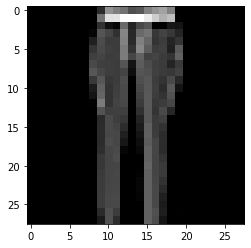

In [ ]:
plt.imshow(x_test_reshape[6000].reshape(28,28),cmap='gray')
plt.show

In [ ]:
y_pred = Cnn_Lenet_5_model.predict(x_test_Lenet)

313/313 [==============================] - 1s 2ms/step


In [ ]:
np.argmax(y_test_encoded[6000])

1

#VGG16

##Data preparation/preprocessing

Reshaping the data to (32,32,3) for VGG16, VGG19 cnn architectures

In [ ]:
x_train_reshaped_cnn_arc = np.pad(array = x_train, pad_width = ((0,0),(10,10),(18,18)))  #to create 32*32*3=3072 parameters we have to adjust the padding
x_test_reshaped_cnn_arc = np.pad(array = x_test, pad_width = ((0,0),(10,10),(18,18)))   #to create 32*32*3=3072 parameters we have to adjust the padding
x_train_reshaped_cnn_arc.shape,x_test_reshaped_cnn_arc.shape

((60000, 48, 64), (10000, 48, 64))

In [ ]:
x_train_reshaped_cnn_arc = np.reshape(x_train_reshaped_cnn_arc, newshape = (60000,32,32,3))
x_test_reshaped_cnn_arc = np.reshape(x_test_reshaped_cnn_arc, newshape = (10000,32,32,3))

In [ ]:
x_train_reshaped_cnn_arc.shape,x_test_reshaped_cnn_arc.shape

((60000, 32, 32, 3), (10000, 32, 32, 3))

In [ ]:
x_train_reshaped_cnn_arc = x_train_reshaped_cnn_arc.astype('float')
x_test_reshaped_cnn_arc = x_test_reshaped_cnn_arc.astype('float')

In [ ]:
x_train_reshaped_cnn_arc.dtype, x_test_reshaped_cnn_arc.dtype

(dtype('float64'), dtype('float64'))

##Model Building

In [ ]:
#remove the dense layers
vgg16 = VGG16(input_shape = (32,32,3),weights = 'imagenet', include_top = False)

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
#don't train existing weights
for layer in vgg16.layers:
  layer.trainable = False

In [ ]:
#our layers - we can add more if we want
x = Flatten()(vgg16.output)

In [ ]:
prediction = Dense(10,activation = 'softmax')(x)

In [ ]:
#create a model object
VGG16_model = Model(inputs=vgg16.input,outputs= prediction)

In [ ]:
VGG16_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0     

In [ ]:
VGG16_model.compile(optimizer='adam',loss= 'categorical_crossentropy',metrics='accuracy')

##Model Training

In [ ]:
VGG16_model.fit(x_train_reshaped_cnn_arc,y= y_train_encoded,batch_size=32,epochs = 5,validation_data=(x_test_reshaped_cnn_arc,y_test_encoded),verbose = 1)

Epoch 1/5
1875/1875 [==============================] - 21s 11ms/step - loss: 1.0705 - accuracy: 0.6599 - val_loss: 0.8375 - val_accuracy: 0.7112
Epoch 2/5
1875/1875 [==============================] - 21s 11ms/step - loss: 0.7693 - accuracy: 0.7359 - val_loss: 0.7383 - val_accuracy: 0.7394
Epoch 3/5
1875/1875 [==============================] - 23s 12ms/step - loss: 0.7021 - accuracy: 0.7534 - val_loss: 0.6924 - val_accuracy: 0.7519
Epoch 4/5
1875/1875 [==============================] - 21s 11ms/step - loss: 0.6656 - accuracy: 0.7633 - val_loss: 0.6691 - val_accuracy: 0.7616
Epoch 5/5
1875/1875 [==============================] - 21s 11ms/step - loss: 0.6414 - accuracy: 0.7715 - val_loss: 0.6493 - val_accuracy: 0.7659


##Model Testing

In [ ]:
vgg16_evaluation_score = VGG16_model.evaluate(x=x_test_reshaped_cnn_arc,y=y_test_encoded)

313/313 [==============================] - 3s 10ms/step - loss: 0.6493 - accuracy: 0.7659


In [ ]:
vgg16_evaluation_score

[0.6493412852287292, 0.7659000158309937]

In [ ]:
print('Loss        =', vgg16_evaluation_score[0])
print('Accuracy    =', vgg16_evaluation_score[1])

Loss        = 0.6493412852287292
Accuracy    = 0.7659000158309937


In [ ]:
vgg16_model_loss = vgg16_evaluation_score[0]
vgg16_model_accuracy = vgg16_evaluation_score[1]

##Model Prediction

<function matplotlib.pyplot.show(*args, **kw)>

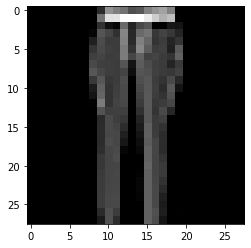

In [ ]:
plt.imshow(x_test_reshape[6000].reshape(28,28),cmap='gray')
plt.show

In [ ]:
y_pred = VGG16_model.predict(x_test_reshaped_cnn_arc)

313/313 [==============================] - 3s 8ms/step


In [ ]:
np.argmax(y_test_encoded[6000])

1

#VGG19

##Model Building

In [ ]:
from keras.applications.vgg19 import VGG19

In [ ]:
#remove the dense layers
vgg19 = VGG19(input_shape = (32,32,3),weights = 'imagenet', include_top = False)

80134624/80134624 [==============================] - 0s 0us/step


In [ ]:
#don't train existing weights
for layer in vgg19.layers:
  layer.trainable = False

In [ ]:
#our layers - we can add more if we want
x = Flatten()(vgg19.output)

In [ ]:
prediction = Dense(10,activation = 'softmax')(x)

In [ ]:
#create a model object
VGG19_model = Model(inputs=vgg19.input,outputs= prediction)

In [ ]:
VGG19_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0   

In [ ]:
VGG19_model.compile(optimizer='adam',loss= 'categorical_crossentropy',metrics='accuracy')

In [ ]:
x_train_reshaped_cnn_arc.shape, x_test_reshaped_cnn_arc.shape

((60000, 32, 32, 3), (10000, 32, 32, 3))

##Model Training

In [ ]:
VGG19_model.fit(x_train_reshaped_cnn_arc,y= y_train_encoded,batch_size=32,epochs = 5,validation_data=(x_test_reshaped_cnn_arc,y_test_encoded),verbose = 1)

Epoch 1/5
1875/1875 [==============================] - 26s 13ms/step - loss: 1.0925 - accuracy: 0.6403 - val_loss: 0.8798 - val_accuracy: 0.7082
Epoch 2/5
1875/1875 [==============================] - 25s 13ms/step - loss: 0.8089 - accuracy: 0.7257 - val_loss: 0.7837 - val_accuracy: 0.7260
Epoch 3/5
1875/1875 [==============================] - 25s 13ms/step - loss: 0.7387 - accuracy: 0.7432 - val_loss: 0.7333 - val_accuracy: 0.7395
Epoch 4/5
1875/1875 [==============================] - 25s 14ms/step - loss: 0.7010 - accuracy: 0.7519 - val_loss: 0.7060 - val_accuracy: 0.7480
Epoch 5/5
1875/1875 [==============================] - 25s 13ms/step - loss: 0.6775 - accuracy: 0.7577 - val_loss: 0.6831 - val_accuracy: 0.7556


##Model Testing

In [ ]:
vgg19_evaluation_score = VGG19_model.evaluate(x=x_test_reshaped_cnn_arc,y=y_test_encoded)

313/313 [==============================] - 4s 12ms/step - loss: 0.6831 - accuracy: 0.7556


In [ ]:
vgg19_evaluation_score

[0.6830707788467407, 0.7555999755859375]

In [ ]:
print('Loss        =', vgg19_evaluation_score[0])
print('Accuracy    =', vgg19_evaluation_score[1])

Loss        = 0.6830707788467407
Accuracy    = 0.7555999755859375


In [ ]:
vgg19_model_loss = vgg19_evaluation_score[0]
vgg19_model_accuracy = vgg19_evaluation_score[1]

##Model Prediction

<function matplotlib.pyplot.show(*args, **kw)>

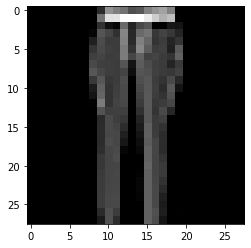

In [ ]:
plt.imshow(x_test_reshape[6000].reshape(28,28),cmap='gray')
plt.show

In [ ]:
y_pred = VGG19_model.predict(x_test_reshaped_cnn_arc)

313/313 [==============================] - 3s 10ms/step


In [ ]:
np.argmax(y_test_encoded[6000])

1

#ResNet_50

##Model Building

In [ ]:
#remove the dense layers
ResNet = ResNet50(input_shape = (32,32,3),weights = 'imagenet', include_top = False)

94765736/94765736 [==============================] - 2s 0us/step


In [ ]:
#don't train existing weights

# for layer in ResNet50.layers:
#   layer.trainable = False

ResNet50.trainable = False

In [ ]:
  #our layers - we can add more if we want
output = ResNet.layers[-1].output
x = keras.layers.Flatten()(output)

In [ ]:
prediction = Dense(10,activation = 'softmax')(x)

In [ ]:
#create a model object
ResNet_model = Model(inputs = ResNet.input,outputs= prediction)

In [ ]:
ResNet_model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 38, 38, 3)    0           ['input_3[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 16, 16, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 16, 16, 64)   256         ['conv1_conv[0][0]']             
                                                                                            

In [ ]:
ResNet_model.compile(optimizer='adam',loss= 'categorical_crossentropy',metrics='accuracy')

##Model Training

In [ ]:
ResNet_model.fit(x_train_reshaped_cnn_arc,y= y_train_encoded,batch_size=32,epochs = 5,validation_data=(x_test_reshaped_cnn_arc,y_test_encoded),verbose = 1)

Epoch 1/5
1875/1875 [==============================] - 89s 44ms/step - loss: 0.7622 - accuracy: 0.7728 - val_loss: 0.6513 - val_accuracy: 0.7759
Epoch 2/5
1875/1875 [==============================] - 81s 43ms/step - loss: 0.7696 - accuracy: 0.7554 - val_loss: 0.5609 - val_accuracy: 0.7915
Epoch 3/5
1875/1875 [==============================] - 80s 43ms/step - loss: 0.5375 - accuracy: 0.8202 - val_loss: 0.5179 - val_accuracy: 0.8145
Epoch 4/5
1875/1875 [==============================] - 79s 42ms/step - loss: 0.5473 - accuracy: 0.8127 - val_loss: 0.9670 - val_accuracy: 0.7028
Epoch 5/5
1875/1875 [==============================] - 80s 43ms/step - loss: 0.4512 - accuracy: 0.8420 - val_loss: 0.4915 - val_accuracy: 0.8192


##Model Testing

In [ ]:
ResNet_model_evaluation_score = ResNet_model.evaluate(x=x_test_reshaped_cnn_arc,y=y_test_encoded)

313/313 [==============================] - 4s 14ms/step - loss: 0.4915 - accuracy: 0.8192


In [ ]:
ResNet_model_evaluation_score

[0.4915343225002289, 0.8191999793052673]

In [ ]:
print('Loss        =', ResNet_model_evaluation_score[0])
print('Accuracy    =', ResNet_model_evaluation_score[1])

Loss        = 0.4915343225002289
Accuracy    = 0.8191999793052673


In [ ]:
ResNet_model_loss = ResNet_model_evaluation_score[0]
ResNet_model_accuracy = ResNet_model_evaluation_score[1]

##Model Prediction

<function matplotlib.pyplot.show(*args, **kw)>

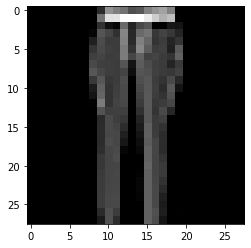

In [ ]:
plt.imshow(x_test_reshape[6000].reshape(28,28),cmap='gray')
plt.show

In [ ]:
y_pred = ResNet_model.predict(x_test_reshaped_cnn_arc) #resnet_50 model

313/313 [==============================] - 5s 12ms/step


In [ ]:
np.argmax(y_test_encoded[6000])

1

#Conclusion

In [ ]:
comparing_models = {'Models'    : ["ANN", "CNN","Lenet 5", "VGG16", "VGG19", "ResNet 50" ],
                    'Loss Values'    : [Ann_model_loss, Cnn_model_loss,lenet5_model_loss, vgg16_model_loss, vgg19_model_loss, ResNet_model_loss],
                    'Accuracy Values': [Ann_model_accuracy,Cnn_model_accuracy, lenet5_model_accuracy, vgg16_model_accuracy,vgg19_model_accuracy, ResNet_model_accuracy]}

In [ ]:
table = pd.DataFrame(comparing_models)
table

,Models,Loss Values,Accuracy Values
0,ANN,0.352180,0.8719
1,CNN,0.334525,0.9045
2,Lenet 5,0.383840,0.8608
3,VGG16,0.649341,0.7659
4,VGG19,0.683071,0.7556
5,ResNet 50,0.491534,0.8192


End